In [23]:
    import networkx as nx
    import networkx.algorithms.community as nxcom
    from matplotlib import pyplot as plt
    %matplotlib inline
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    import random

In [24]:
import os

In [25]:
    data_path = './data2.txt'
    data_path1 = './data.txt'
    G_social1 = nx.read_edgelist(data_path1)
    G_social = nx.read_edgelist(data_path)

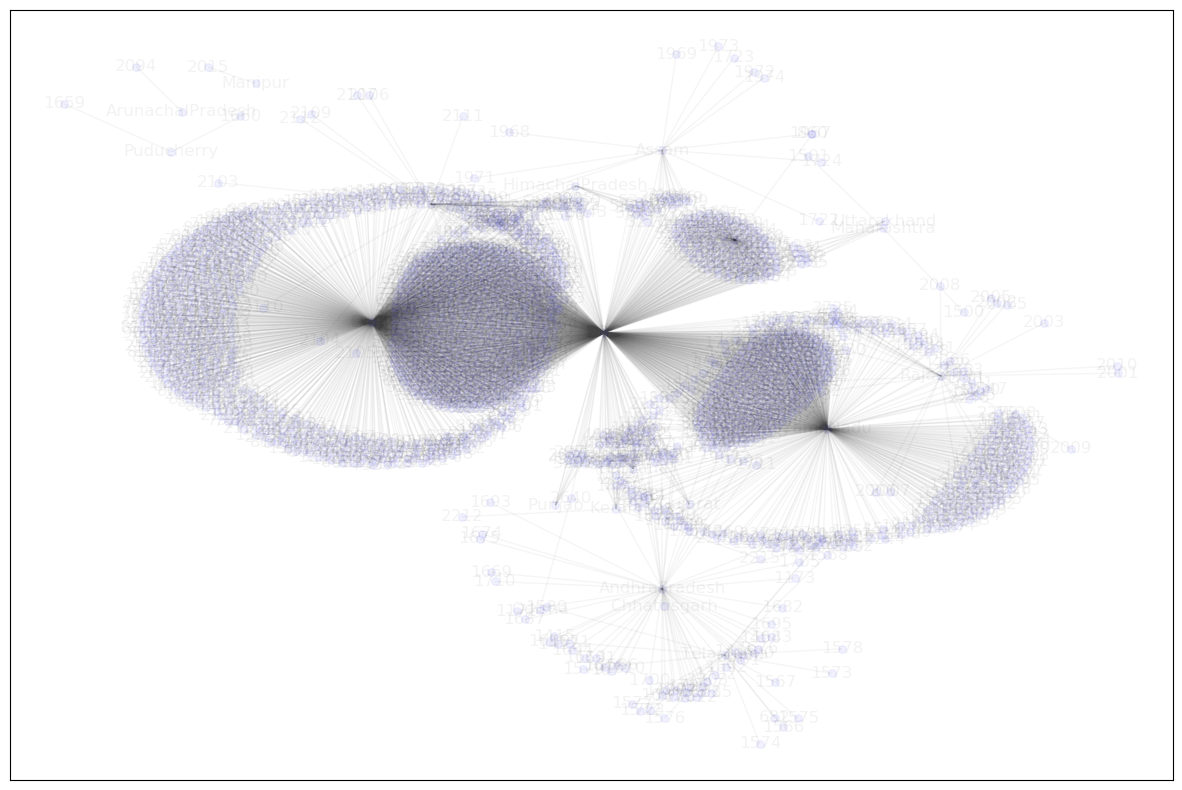

In [26]:
    pos = nx.spring_layout(G_social, k=0.1)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    nx.draw_networkx(
        G_social, 
        pos=pos, 
        node_size=30, 
        edge_color="#444444", 
        alpha=0.05, 
        with_labels=True,
        node_color='blue'
        )
    plt.show()

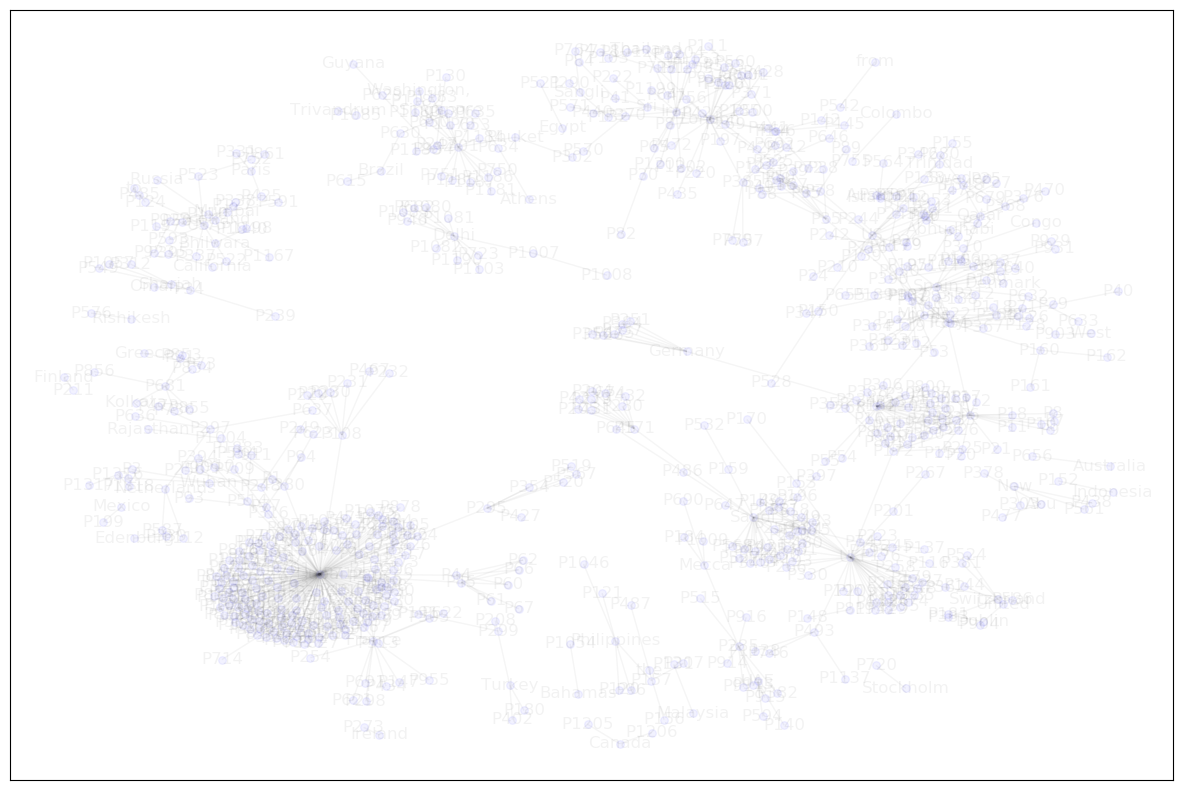

In [27]:
    pos = nx.spring_layout(G_social1, k=0.1)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    nx.draw_networkx(
        G_social1, 
        pos=pos, 
        node_size=30, 
        edge_color="#444444", 
        alpha=0.05, 
        with_labels=True,
        node_color='blue'
        )
    plt.show()

In [28]:
import networkx as nx

__all__ = ["girvan_newman"]


def girvan_newman(G, most_valuable_edge=None):
    if G.number_of_edges() == 0:
        yield tuple(nx.connected_components(G))
        return
    if most_valuable_edge is None:
        def most_valuable_edge(G):

            betweenness = nx.edge_betweenness_centrality(G)
            return max(betweenness, key=betweenness.get)

    g = G.copy().to_undirected()
    g.remove_edges_from(nx.selfloop_edges(g))
    
    while g.number_of_edges() > 0:
        yield _without_most_central_edges(g, most_valuable_edge)


#gives the community by removing the most conected vertex using betweeness centrality as the metrics
def _without_most_central_edges(G, most_valuable_edge):
    original_num_components = nx.number_connected_components(G)
    num_new_components = original_num_components
    
    while num_new_components <= original_num_components:
        edge = most_valuable_edge(G)
        G.remove_edge(*edge)
        new_components = tuple(nx.connected_components(G))
        num_new_components = len(new_components)
    return new_components

In [29]:
comp = girvan_newman(G_social)
result1=tuple(sorted(c) for c in next(comp))
len(result1)


7

In [30]:
comp = girvan_newman(G_social1)
result=tuple(sorted(c) for c in next(comp))
len(result)


73

In [31]:
#International travel metrics in the initial phase for girvan newman algo

#Modularity is one measure of the structure of networks or graphs. 
#It was designed to measure the strength of division of a network into modules

#The performance of a partition is the ratio of the number of intra-community edges 
#plus inter-community non-edges with the total number of potential edges.

#The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.

import networkx.algorithms.community as nx_comm

a=nx_comm.modularity(G_social1,result)
b=nx_comm.coverage(G_social1,result)
c=nx_comm.performance(G_social1,result)
print(a,b,c)

0.8879031448293239 0.9984350547730829 0.913942282363335


In [32]:
#local travel metrics in the initial phase for girvan newman algorithm 

a=nx_comm.modularity(G_social,result1)
b=nx_comm.coverage(G_social,result1)
c=nx_comm.performance(G_social,result1)
print(a,b,c)


0.06644103533497285 0.9963210702341138 0.10642173917247155
